# Asia Bayesian Network.

authors:<br>
Jacob Schreiber [<a href="mailto:jmschreiber91@gmail.com">jmschreiber91@gmail.com</a>]<br>
Nicholas Farn [<a href="mailto:nicholasfarn@gmail.com">nicholasfarn@gmail.com</a>]

This example shows how to create an Asia Bayesian Network. A description of the network can be found <a href="http://www.norsys.com/tutorials/netica/secA/tut_A1.htm">here</a>.

In [1]:
%pylab inline
from pomegranate import *

Populating the interactive namespace from numpy and matplotlib


Let's create the distributions starting with Asia and the conditional probability for tuberculosis.

In [2]:
asia = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

tuberculosis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.2 ],
     [ 'True', 'False', 0.8 ],
     [ 'False', 'True', 0.01 ],
     [ 'False', 'False', 0.99 ]], [asia])

Then the distribution for smoking along with the conditional probability of lung cancer and bronchitis.

In [3]:
smoking = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

lung = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.75 ],
     [ 'True', 'False', 0.25 ],
     [ 'False', 'True', 0.02 ],
     [ 'False', 'False', 0.98 ]], [smoking] )

bronchitis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.92 ],
     [ 'True', 'False', 0.08 ],
     [ 'False', 'True', 0.03 ],
     [ 'False', 'False', 0.97 ]], [smoking] )

tuberculosis_or_cancer = ConditionalProbabilityTable(
    [[ 'True', 'True', 'True', 1.0 ],
     [ 'True', 'True', 'False', 0.0 ],
     [ 'True', 'False', 'True', 1.0 ],
     [ 'True', 'False', 'False', 0.0 ],
     [ 'False', 'True', 'True', 1.0 ],
     [ 'False', 'True', 'False', 0.0 ],
     [ 'False', 'False', 'True', 0.0 ],
     [ 'False', 'False', 'False', 1.0 ]], [tuberculosis, lung] )

Then the probability of an x-ray, which is dependent on whether one has tuberculosis or cancer.

In [4]:
xray = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.885 ],
     [ 'True', 'False', 0.115 ],
     [ 'False', 'True', 0.04 ],
     [ 'False', 'False', 0.96 ]], [tuberculosis_or_cancer] )

Finally the probability of dyspnea, which is dependent on whether one has bronchitis and tuberculosis or cancer.

In [5]:
dyspnea = ConditionalProbabilityTable(
    [[ 'True', 'True', 'True', 0.96 ],
     [ 'True', 'True', 'False', 0.04 ],
     [ 'True', 'False', 'True', 0.89 ],
     [ 'True', 'False', 'False', 0.11 ],
     [ 'False', 'True', 'True', 0.96 ],
     [ 'False', 'True', 'False', 0.04 ],
     [ 'False', 'False', 'True', 0.89 ],
     [ 'False', 'False', 'False', 0.11 ]], [tuberculosis_or_cancer, bronchitis])

Now let's create the states for our bayesian network.

In [6]:
s0 = State( asia, name="asia" )
s1 = State( tuberculosis, name="tuberculosis" )
s2 = State( smoking, name="smoker" )
s3 = State( lung, name="cancer" )
s4 = State( bronchitis, name="bronchitis" )
s5 = State( tuberculosis_or_cancer, name="TvC" )
s6 = State( xray, name="xray" )
s7 = State( dyspnea, name='dyspnea' )

Finally we can create our bayesian network. We do this by creating an instance of BayesianNetwork, then adding the states.

In [7]:
network = BayesianNetwork( "asia" )
network.add_nodes(s0, s1, s2, s3, s4, s5, s6, s7)

Then we add the edges to our network.

In [8]:
network.add_edge( s0, s1 )
network.add_edge( s1, s5 )
network.add_edge( s2, s3 )
network.add_edge( s2, s4 )
network.add_edge( s3, s5 )
network.add_edge( s5, s6 )
network.add_edge( s5, s7 )
network.add_edge( s4, s7 )

We finish by baking our network to finalize its structure.

In [9]:
network.bake()

Let's take a look at the resulting structure:

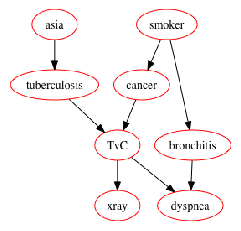

In [10]:
network.plot()

Now let's test out our network on a person who has tuberculosis, is not a smoker, and has bronchitis.

In [11]:
observations = { 'tuberculosis' : 'True', 'smoker' : 'False', 'bronchitis' : 'True' }
beliefs = map( str, network.predict_proba( observations ) )
print("\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

asia		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.9523809523809521,
            "False" :0.04761904761904782
        }
    ],
    "frozen" :false
}
tuberculosis		True
smoker		False
cancer		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.9799999999999995,
            "True" :0.020000000000000438
        }
    ],
    "frozen" :false
}
bronchitis		True
TvC		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.0,
            "True" :1.0
        }
    ],
    "frozen" :false
}
xray		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.11500000000000017,
            "True" :0.8849999999999999
        }
    ],
    "frozen" :false
}
dyspnea